# Import packages and functions

In [1]:
import sys
# force the notebook to look for files in the upper level directory
sys.path.insert(1, '../')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up constants

In [3]:
METRICS_PATH = "../data/processed/model_metrics_comparison_with_raw.xlsx"
SCORING_METRICS = ["precision_weighted", "recall_weighted", "roc_auc", "f1_weighted"]
SAVE_PATH = "../plots/"
SAVE_PLOT = True

# Read in data

In [4]:
df_metrics = pd.read_excel(METRICS_PATH)
df_metrics

,model_type,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,XGBClassifier,Metal,precision_weighted,0.855847,0.007573,"[0.8695652173913043, 0.8406349206349206, 0.856..."
1,XGBClassifier,Metal,recall_weighted,0.857246,0.021014,"[0.8666666666666667, 0.8478260869565217, 0.847..."
2,XGBClassifier,Metal,roc_auc,0.858108,0.016892,"[0.8648648648648648, 0.8344594594594595, 0.868..."
3,XGBClassifier,Metal,f1_weighted,0.845803,0.013550,"[0.843741765480896, 0.8355731225296441, 0.8158..."
4,XGBClassifier,Insulator,precision_weighted,0.867475,0.022641,"[0.8386749482401656, 0.8674749163879598, 0.847..."
...,...,...,...,...,...,...
91,GradientBoostingClassifier,MIT,f1_weighted,0.855454,0.021882,"[0.8494735538213799, 0.8167557932263816, 0.861..."
92,GradientBoostingClassifier,Multiclass,precision_weighted,0.758569,0.015523,"[0.7639751552795032, 0.7193415637860081, 0.730..."
93,GradientBoostingClassifier,Multiclass,recall_weighted,0.739130,0.026087,"[0.7608695652173914, 0.7333333333333333, 0.717..."
94,GradientBoostingClassifier,Multiclass,roc_auc_ovr_weighted,0.903106,0.023277,"[0.8914771549042648, 0.9157484757484758, 0.892..."


In [5]:
df_metrics["raw_metric"] = pd.eval(df_metrics["raw_metric"])

# Summary plot

## Bar plot version

In [6]:
df_for_plot = df_metrics.replace(
    {"metric_name": {"roc_auc_ovr_weighted": "roc_auc"}}).sort_values(by="metric_value", ignore_index=True, ascending=False)

/Users/jasonrpw/PycharmProjects/mit_model_code/venv/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 720x720 with 0 Axes>

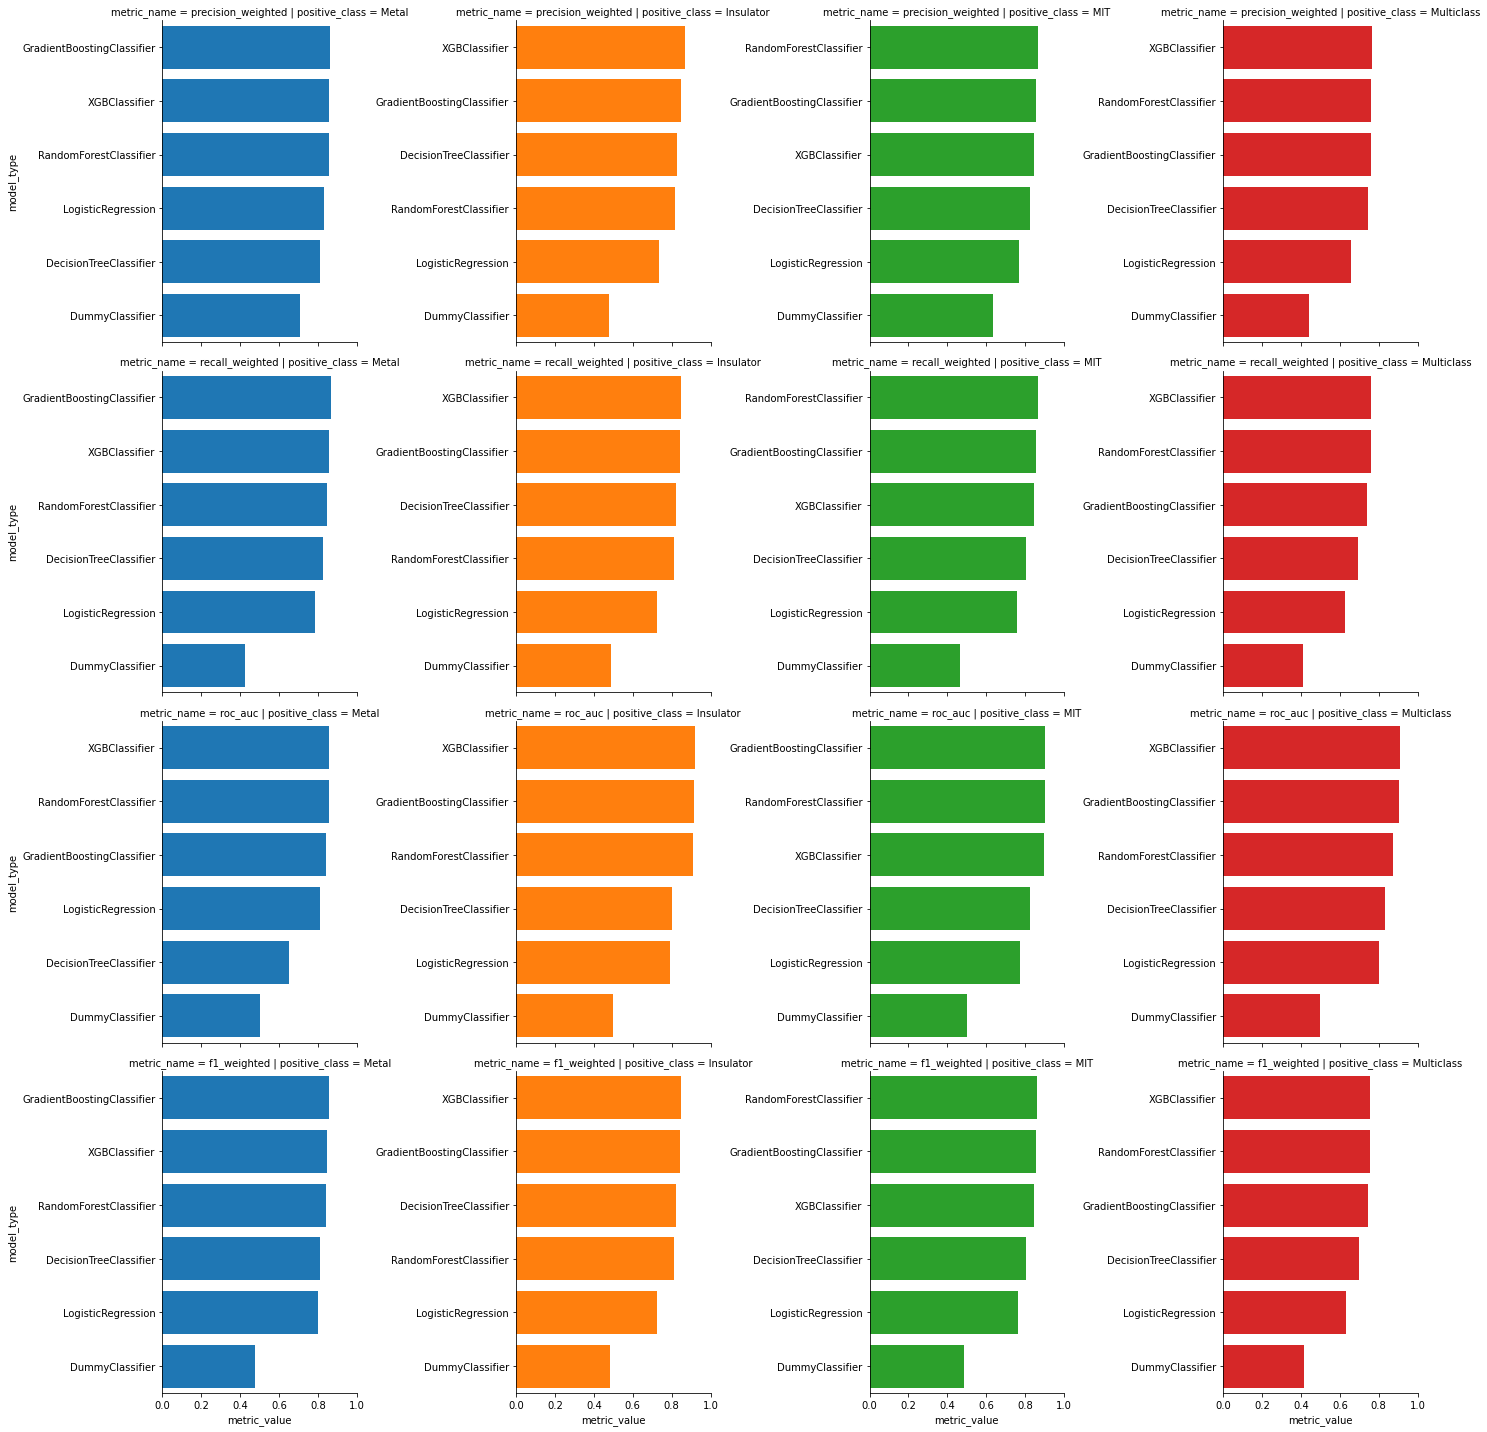

In [7]:
plt.figure(figsize=(10,10))
g = sns.FacetGrid(df_for_plot, col="positive_class", row="metric_name", height=5, sharey=False,
                  col_order=["Metal", "Insulator", "MIT", "Multiclass"], row_order=SCORING_METRICS, 
                  hue="positive_class", hue_order=["Metal", "Insulator", "MIT", "Multiclass"],
                  xlim=(0, 1))
model_comparison_bar = g.map(sns.barplot, "metric_value", "model_type", saturation=1)

In [8]:
def autolabel(ax, **kwargs):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    
    Code adapted from https://matplotlib.org/3.3.1/gallery/lines_bars_and_markers/barchart.html
    """
    for rect in ax.patches:
        width = rect.get_width()
        x, y, xerrs = get_errorbars(**kwargs)
        ax.errorbar(x, y, xerr=xerrs, capsize=3, ls="none", ecolor="black")
        ax.annotate('{:.4f}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(-1, -12),
                    textcoords="offset points",
                    ha='right', va='center', fontsize=10, color="white")

        
def get_errorbars(metric_name, positive_class, df_input=df_for_plot):
    """Attach errorbars to each sub-barplot"""
    df_selected = df_input.loc[(df_input.metric_name == metric_name) & (df_input.positive_class == positive_class)]
    x_pos = df_selected.metric_value
    y_pos = range(len(df_selected.model_type))
    x_errs = df_selected.metric_dispersion / 2
    return x_pos, y_pos, x_errs

In [9]:
for (metric, pos_class), ax in g.axes_dict.items():
    ax.set_ylabel(None)
    autolabel(ax, metric_name=metric, positive_class=pos_class)

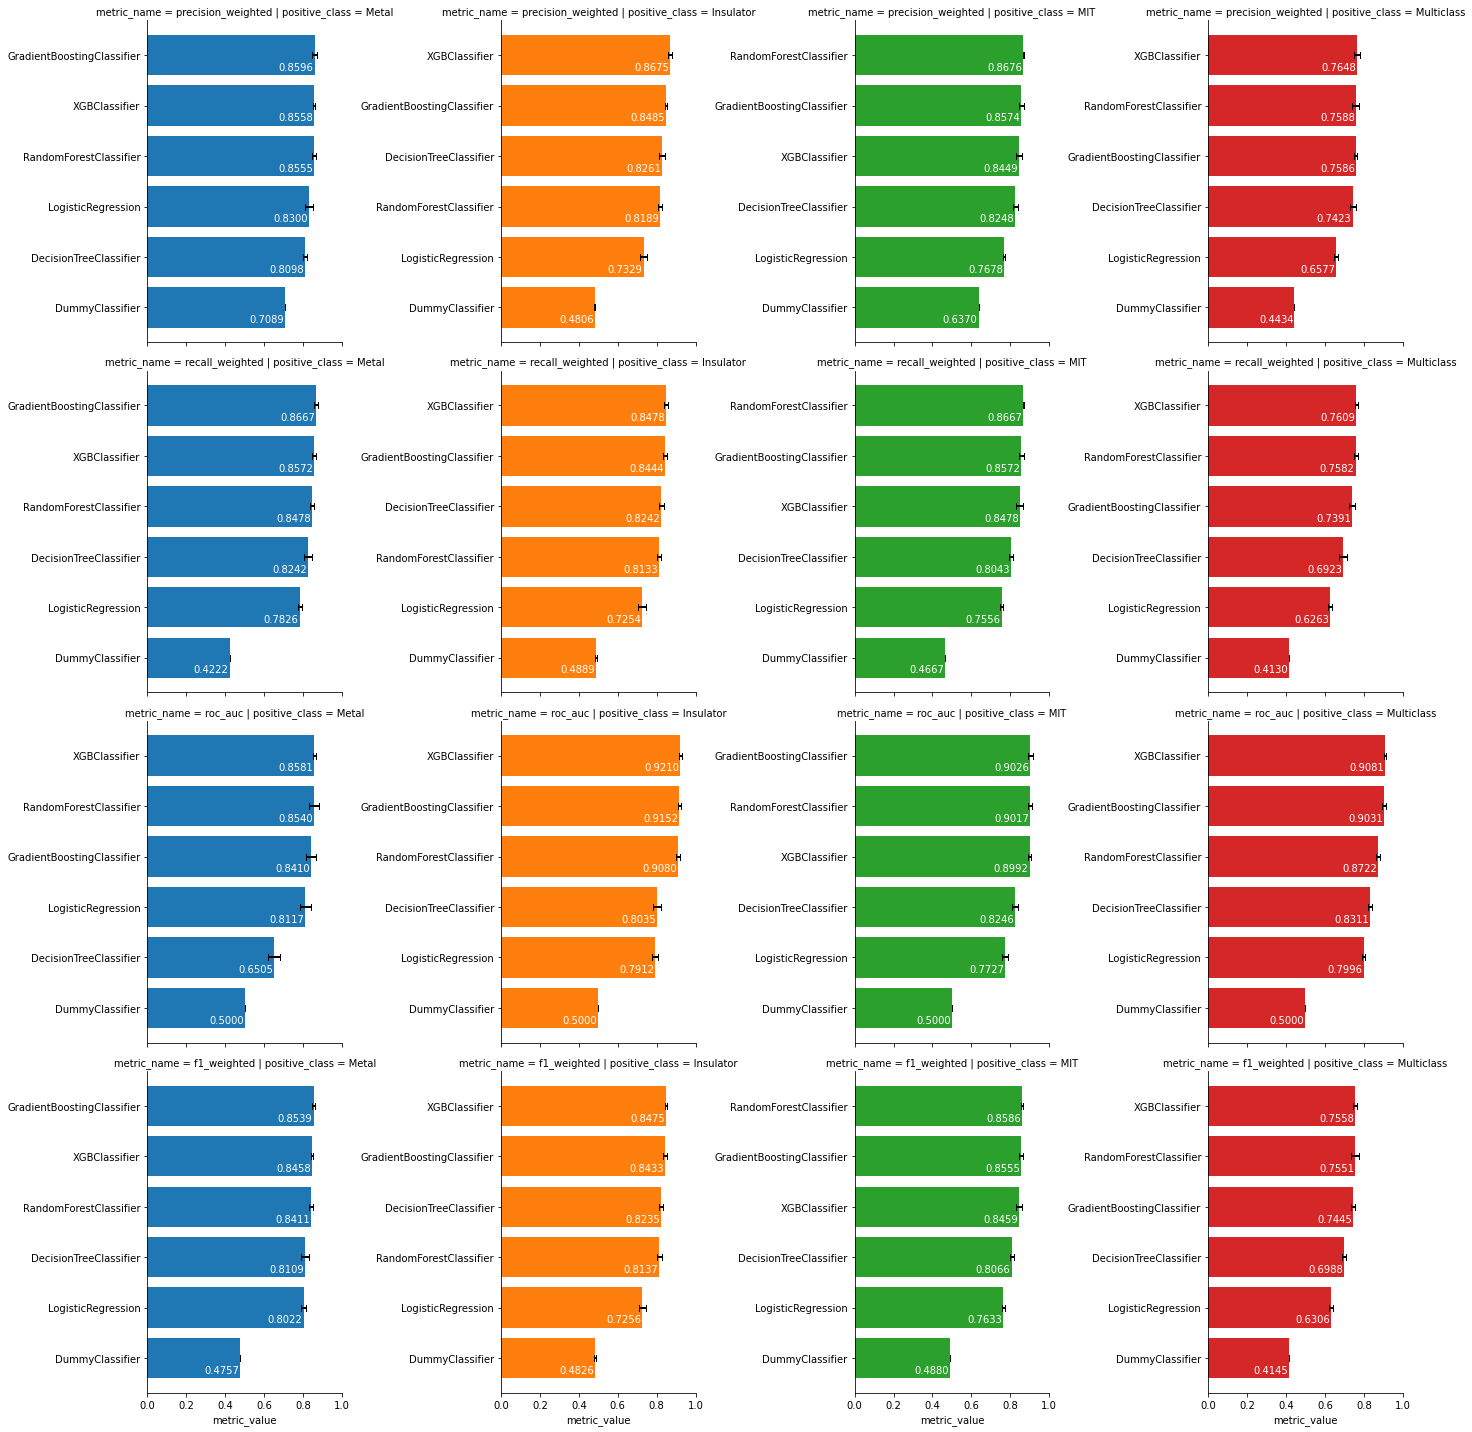

In [10]:
model_comparison_bar.fig

In [11]:
if SAVE_PLOT: model_comparison_bar.fig.savefig("../plots/model_comparison_bar.pdf", dpi=300, bbox_inches="tight")

## Boxplot version

In [12]:
df_for_barplot = df_for_plot.drop(columns=["metric_dispersion"]).explode(column="raw_metric", ignore_index=True)
df_for_barplot

,model_type,positive_class,metric_name,metric_value,raw_metric
0,XGBClassifier,Insulator,roc_auc,0.921048,0.91619
1,XGBClassifier,Insulator,roc_auc,0.921048,0.924
2,XGBClassifier,Insulator,roc_auc,0.921048,0.912381
3,XGBClassifier,Insulator,roc_auc,0.921048,0.908
4,XGBClassifier,Insulator,roc_auc,0.921048,0.918095
...,...,...,...,...,...
955,DummyClassifier,Multiclass,recall_weighted,0.413043,0.413043
956,DummyClassifier,Multiclass,recall_weighted,0.413043,0.413043
957,DummyClassifier,Multiclass,recall_weighted,0.413043,0.413043
958,DummyClassifier,Multiclass,recall_weighted,0.413043,0.413043


/Users/jasonrpw/PycharmProjects/mit_model_code/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jasonrpw/PycharmProjects/mit_model_code/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/jasonrpw/PycharmProjects/mit_model_code/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments with

<Figure size 1440x720 with 0 Axes>

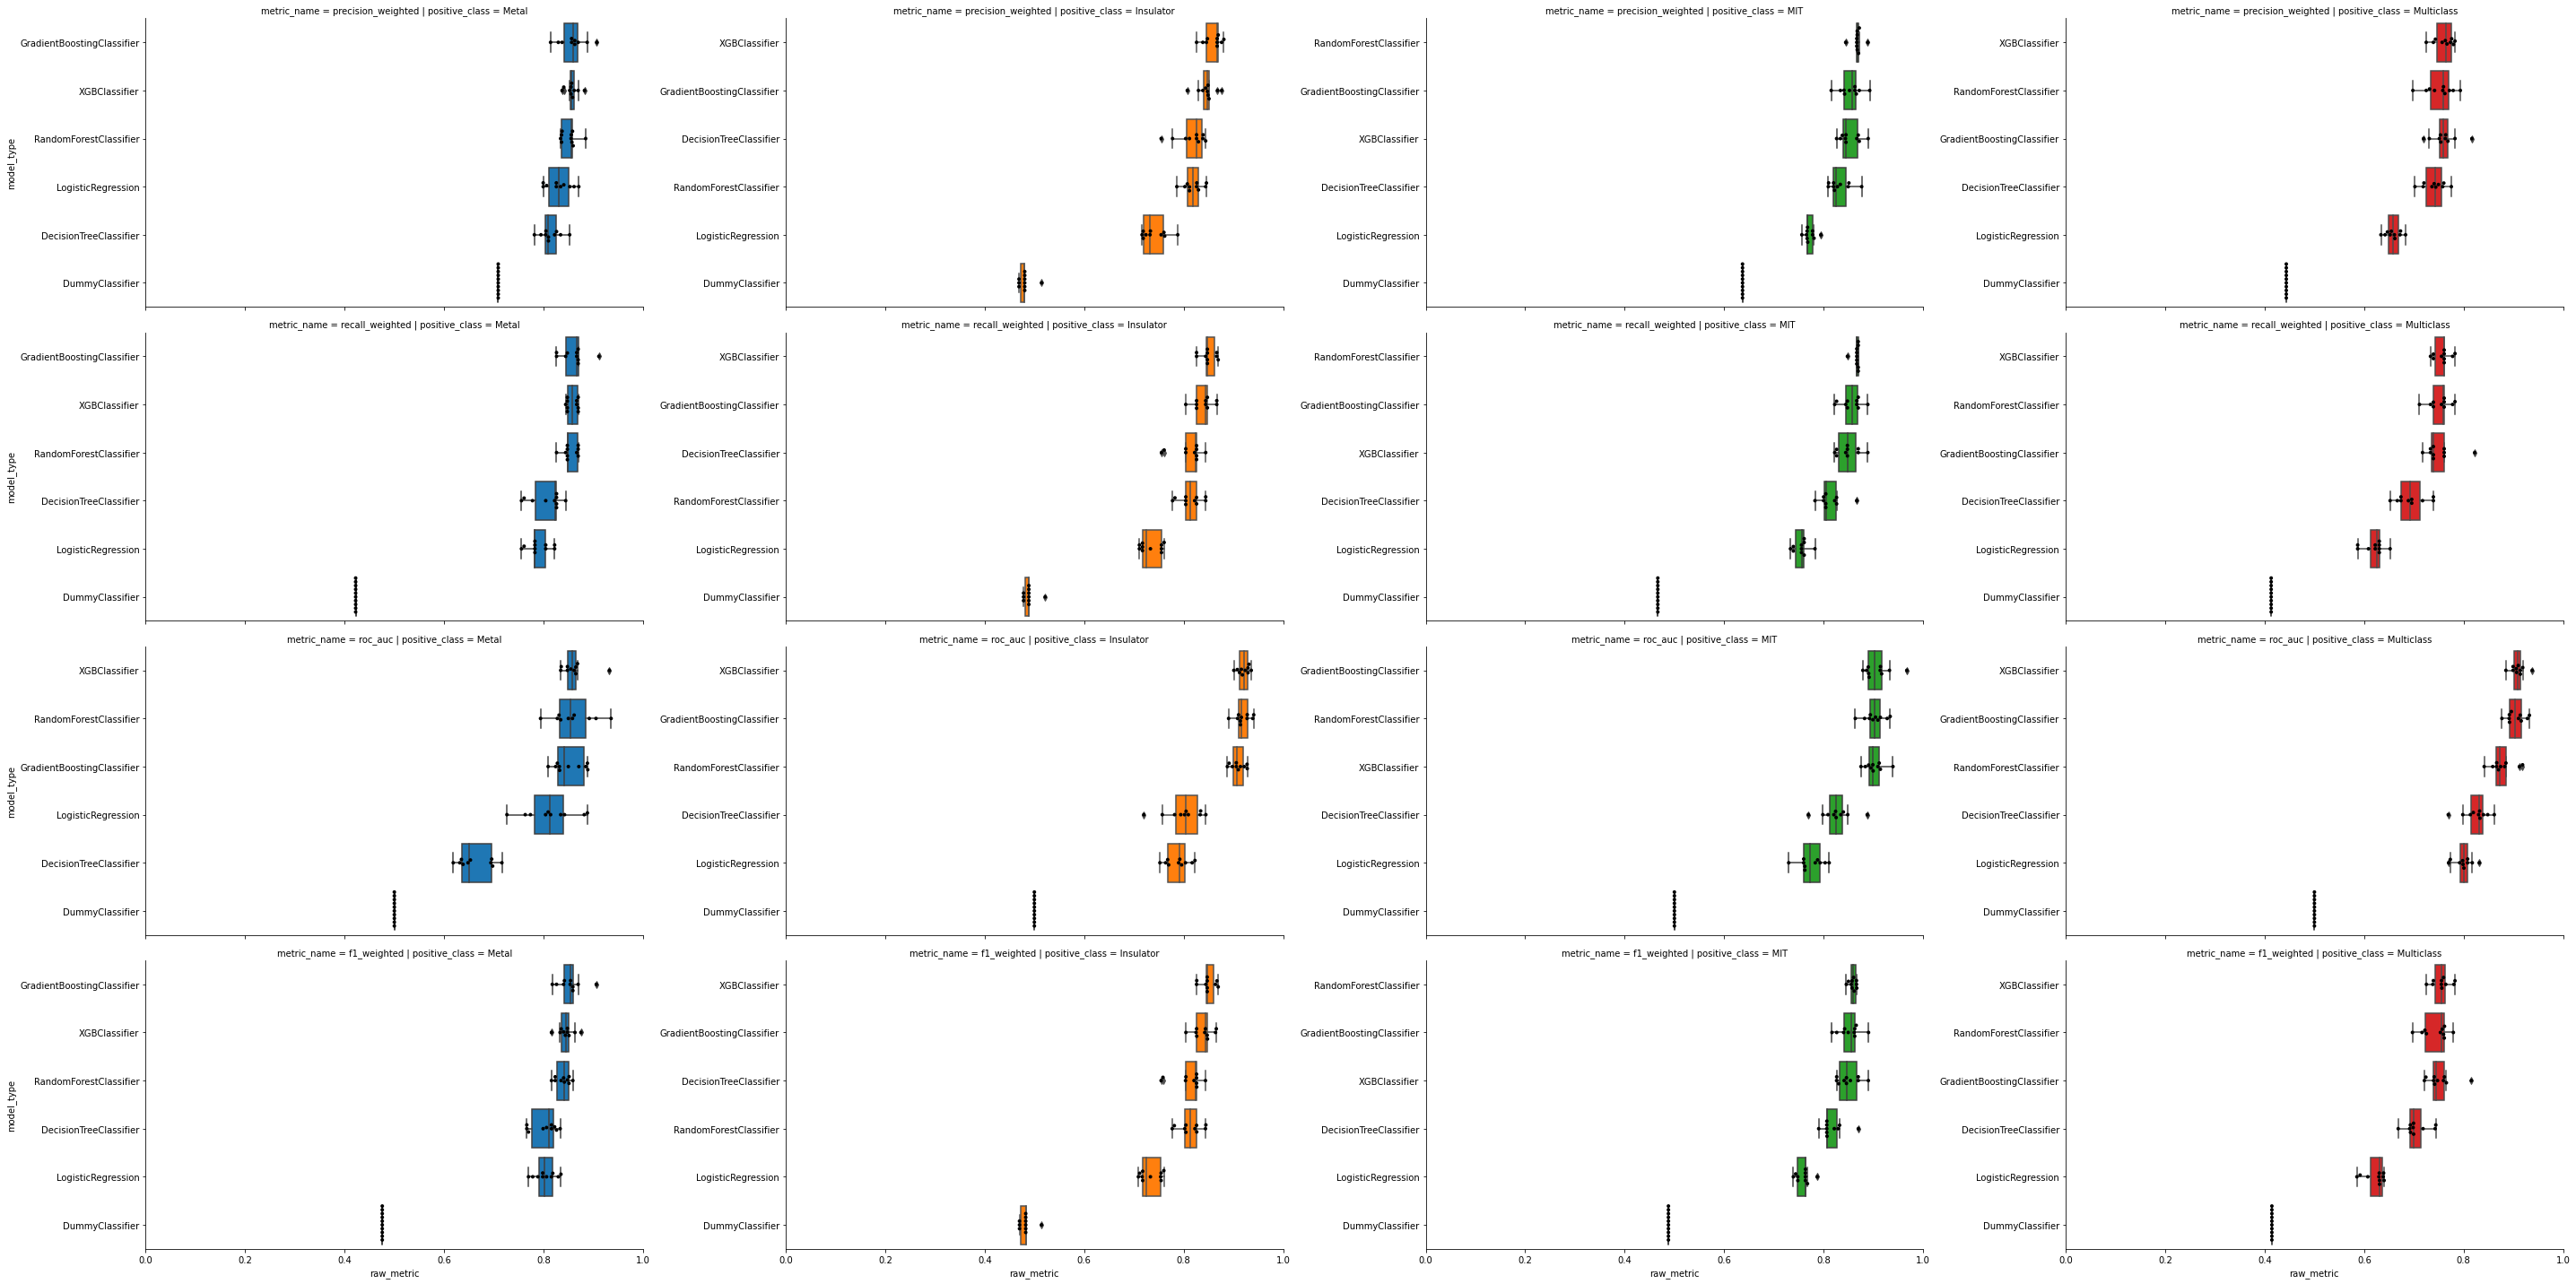

In [13]:
plt.figure(figsize=(20,10))

def fixed_boxplot(*args, label=None, **kwargs):
    """
    Custom boxplot function as a workaround for label error when sns.boxplot is passed to FacetGrid
    Adapted from https://github.com/mwaskom/seaborn/issues/915
    """
    sns.boxplot(*args, **kwargs, labels=[label])
    
g_bar = sns.FacetGrid(data=df_for_barplot, col="positive_class", row="metric_name", height=5, sharey=False, aspect=2,
                      col_order=["Metal", "Insulator", "MIT", "Multiclass"], row_order=SCORING_METRICS, 
                      hue="positive_class", hue_order=["Metal", "Insulator", "MIT", "Multiclass"],
                      xlim=(0, 1))
model_comparison_boxplot = g_bar.map(fixed_boxplot, "raw_metric", "model_type", saturation=1)
# overlay swarmplots on top of boxplots
g_bar.map(sns.swarmplot, "raw_metric", "model_type", color="black", size=4)

In [14]:
if SAVE_PLOT: model_comparison_boxplot.fig.savefig(SAVE_PATH + "model_comparison_boxplot.pdf", dpi=300, bbox_inches="tight")

# Data exploration

In [15]:
df_metrics.loc[df_metrics.model_type == "XGBClassifier"]

,model_type,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,XGBClassifier,Metal,precision_weighted,0.855847,0.007573,"[0.8695652173913043, 0.8406349206349206, 0.856..."
1,XGBClassifier,Metal,recall_weighted,0.857246,0.021014,"[0.8666666666666667, 0.8478260869565217, 0.847..."
2,XGBClassifier,Metal,roc_auc,0.858108,0.016892,"[0.8648648648648648, 0.8344594594594595, 0.868..."
3,XGBClassifier,Metal,f1_weighted,0.845803,0.013550,"[0.843741765480896, 0.8355731225296441, 0.8158..."
4,XGBClassifier,Insulator,precision_weighted,0.867475,0.022641,"[0.8386749482401656, 0.8674749163879598, 0.847..."
5,XGBClassifier,Insulator,recall_weighted,0.847826,0.016667,"[0.8260869565217391, 0.8478260869565217, 0.847..."
6,XGBClassifier,Insulator,roc_auc,0.921048,0.016190,"[0.9161904761904761, 0.924, 0.9123809523809523..."
7,XGBClassifier,Insulator,f1_weighted,0.847466,0.014584,"[0.8264163372859025, 0.8474663377531092, 0.847..."
8,XGBClassifier,MIT,precision_weighted,0.844949,0.029726,"[0.8375388198757764, 0.8449488491048593, 0.871..."
9,XGBClassifier,MIT,recall_weighted,0.847826,0.033454,"[0.8260869565217391, 0.8478260869565217, 0.869..."


In [16]:
def rank_metrics(metric_name, class_type, df_input=df_metrics):
    return df_input.loc[(df_input.positive_class == class_type) & (df_input.metric_name == metric_name)].sort_values(by="metric_value", ascending=False, ignore_index=True)

In [17]:
rank_metrics("precision_weighted", "MIT")

,model_type,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,RandomForestClassifier,MIT,precision_weighted,0.867568,0.002828,"[0.8716542629586108, 0.8675675675675676, 0.888..."
1,GradientBoostingClassifier,MIT,precision_weighted,0.857428,0.023704,"[0.8519992236024845, 0.8152380952380952, 0.871..."
2,XGBClassifier,MIT,precision_weighted,0.844949,0.029726,"[0.8375388198757764, 0.8449488491048593, 0.871..."
3,DecisionTreeClassifier,MIT,precision_weighted,0.824773,0.025481,"[0.82, 0.8278667683702009, 0.8494252873563217,..."
4,LogisticRegression,MIT,precision_weighted,0.767838,0.010988,"[0.7676190476190476, 0.7943899018232818, 0.777..."
5,DummyClassifier,MIT,precision_weighted,0.636975,0.000000,"[0.6369747899159663, 0.6369747899159663, 0.636..."


In [18]:
rank_metrics("recall_weighted", "MIT")

,model_type,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,RandomForestClassifier,MIT,recall_weighted,0.866667,0.002899,"[0.8695652173913043, 0.8666666666666667, 0.869..."
1,GradientBoostingClassifier,MIT,recall_weighted,0.857246,0.023551,"[0.8478260869565217, 0.8222222222222222, 0.869..."
2,XGBClassifier,MIT,recall_weighted,0.847826,0.033454,"[0.8260869565217391, 0.8478260869565217, 0.869..."
3,DecisionTreeClassifier,MIT,recall_weighted,0.804348,0.024034,"[0.8, 0.8260869565217391, 0.8222222222222222, ..."
4,LogisticRegression,MIT,recall_weighted,0.755556,0.017633,"[0.7391304347826086, 0.782608695652174, 0.7555..."
5,DummyClassifier,MIT,recall_weighted,0.466667,0.000000,"[0.4666666666666667, 0.4666666666666667, 0.466..."


In [19]:
rank_metrics("roc_auc", "MIT")

,model_type,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,GradientBoostingClassifier,MIT,roc_auc,0.902584,0.026164,"[0.9324009324009324, 0.8897058823529411, 0.914..."
1,RandomForestClassifier,MIT,roc_auc,0.901709,0.020276,"[0.9277389277389277, 0.898989898989899, 0.8939..."
2,XGBClassifier,MIT,roc_auc,0.899250,0.019488,"[0.875, 0.8951048951048951, 0.9117647058823529..."
3,DecisionTreeClassifier,MIT,roc_auc,0.824592,0.026603,"[0.7983682983682983, 0.8205128205128206, 0.848..."
4,LogisticRegression,MIT,roc_auc,0.772727,0.031177,"[0.7878787878787878, 0.7297979797979798, 0.792..."
5,DummyClassifier,MIT,roc_auc,0.500000,0.000000,"[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ..."


In [20]:
rank_metrics("f1_weighted", "MIT")

,model_type,positive_class,metric_name,metric_value,metric_dispersion,raw_metric
0,RandomForestClassifier,MIT,f1_weighted,0.858644,0.009033,"[0.8660485933503835, 0.8571428571428571, 0.855..."
1,GradientBoostingClassifier,MIT,f1_weighted,0.855454,0.021882,"[0.8494735538213799, 0.8167557932263816, 0.861..."
2,XGBClassifier,MIT,f1_weighted,0.845918,0.032731,"[0.8301408736191344, 0.8459182349123945, 0.869..."
3,DecisionTreeClassifier,MIT,f1_weighted,0.806633,0.020890,"[0.8063492063492064, 0.8213981244671781, 0.829..."
4,LogisticRegression,MIT,f1_weighted,0.763316,0.015352,"[0.7481065918653576, 0.7869759316770187, 0.763..."
5,DummyClassifier,MIT,f1_weighted,0.488000,0.000000,"[0.48799999999999993, 0.48799999999999993, 0.4..."
